In [1]:
from sklearn.datasets.samples_generator import make_blobs

X, _ = make_blobs(n_samples=100, centers=3, n_features=2,
                cluster_std=0.2, random_state=147)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


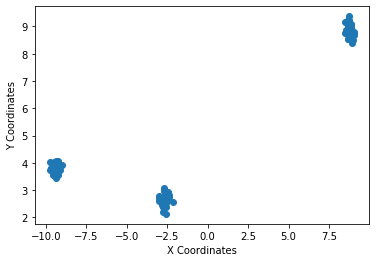

In [2]:
# Scatter plot of the data points
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(X[:, 0], X[:, -1])
plt.xlabel('X Coordinates')
plt.ylabel('Y Coordinates')
plt.show()

In [3]:
# Using scikit-learn to perform K-Means clustering
from sklearn.cluster import KMeans
# Specify the number of clusters (3) and fit the data X
kmeans = KMeans(n_clusters=3, random_state=147).fit(X)

In [4]:
# Get the cluster centroids
kmeans.cluster_centers_

array([[ 8.7598259 ,  8.83405413],
       [-9.40309212,  3.79455399],
       [-2.66074469,  2.60853492]])

In [5]:
# Get the cluster labels
kmeans.labels_

array([2, 1, 1, 0, 2, 0, 1, 1, 0, 1, 0, 2, 0, 1, 2, 1, 0, 0, 1, 2, 0, 2,
       1, 1, 2, 2, 1, 2, 1, 0, 0, 2, 1, 2, 2, 2, 2, 1, 2, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 2, 0, 1, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0, 1, 1, 2, 0,
       1, 2, 2, 1, 0, 1, 2, 2, 0, 1, 2, 1], dtype=int32)

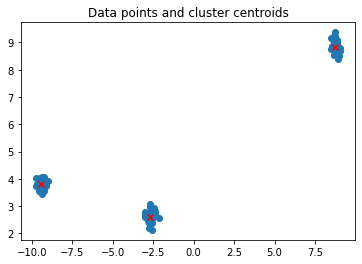

In [6]:
# Plotting the cluster centers and the data points on a 2D plane
plt.scatter(X[:, 0], X[:, -1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],c='red', marker='x')
plt.title('Data points and cluster centroids')
plt.show()

In [7]:
# Calculate silhouette_score
from sklearn.metrics import silhouette_score
print(silhouette_score(X, kmeans.labels_))

0.9598623289979968


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


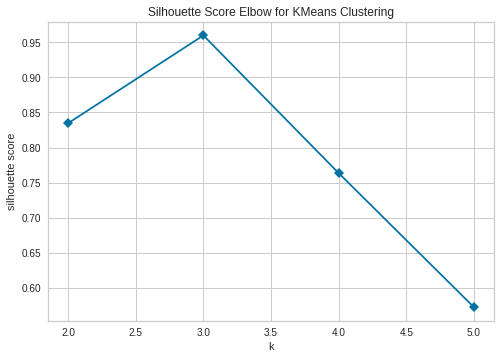

In [8]:
# Import the KElbowVisualizer method
from yellowbrick.cluster import KElbowVisualizer
# Instantiate a scikit-learn K-Means model
model = KMeans(random_state=147)
# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,6), metric='silhouette',timings=False)
# Fit the data and visualize
visualizer.fit(X)
visualizer.poof()